# Extract and save to a csv the keypoints extracted Using MediaPipe

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 31.8 MB/s eta 0:00:00


In [3]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.12.0'

In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/διπλωματική/')

from functions import toCSV, extract_feature

In [5]:
#results of extract feature function from a random image
#The 3D keypoints are returned and the image containing the designed keypoint provided by mediapipe
results = extract_feature("/content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/α/frame_71.png")
print(results)

(367.82383918762207, 144.1382598876953, 4.90472586989199e-07, 324.1058349609375, 143.28008651733398, -0.08661476522684097, 293.1867027282715, 173.42790603637695, -0.13605603575706482, 279.12978172302246, 210.1215362548828, -0.16427543759346008, 275.09862899780273, 234.36695098876953, -0.18961818516254425, 354.90139961242676, 185.78113555908203, -0.15913167595863342, 357.16718673706055, 197.40354537963867, -0.21127773821353912, 345.3467845916748, 207.63996124267578, -0.23765510320663452, 334.4116973876953, 211.6485595703125, -0.25077810883522034, 378.2687187194824, 198.40333938598633, -0.12687507271766663, 369.0337944030762, 224.80401992797852, -0.16688936948776245, 346.4311981201172, 238.03619384765625, -0.17612230777740479, 327.72740364074707, 241.6705322265625, -0.1847965568304062, 388.8168239593506, 208.93657684326172, -0.0959814190864563, 375.76157569885254, 238.07119369506836, -0.13527922332286835, 348.67292404174805, 250.0999641418457, -0.13855615258216858, 326.5309524536133, 255

<class 'numpy.ndarray'>


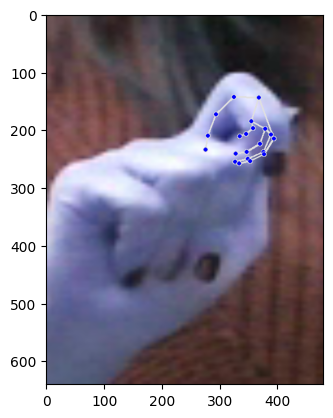

In [6]:
#print the image returned from extract_feature function
print(type(results[-1]))
if isinstance(results[-1], int):
  print("it's int")

from matplotlib import pyplot as plt 

plt.imshow(results[-1])
plt.show()

In [7]:
path = "/content/gdrive/MyDrive/Fingerspelling_video_frames_new/"
print(path)

/content/gdrive/MyDrive/Fingerspelling_video_frames_new/


In [12]:
#find all the subfolders inside the initial data folder
#this folders are named by the name of each individual
import os

folder_list = []
 
for file in os.listdir(path):
    d = os.path.join(path, file)
    if os.path.isdir(d):
        folder_list.append(d)

print(folder_list)

['/content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/thodwris', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/nasia', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/korina', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/kiki', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/katerina', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/giwta', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/galini', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/elisavet', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/anastasia', '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/alexandra']


In [8]:
csv_path = "/content/gdrive/MyDrive/διπλωματική/data.csv"

In [9]:
if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

CSV File does exist, going delete before start extraction and replace it with new


In [14]:
#traverse all the letter folders and extract the features from all the images they contain
for name_folder in folder_list:
  #print("folder is: ", name_folder)

  for entry in os.scandir(name_folder):

      #visit the folders that have only one letter
      if entry.is_dir() and len(entry.name) == 1:

          # Access the folder
          letter_folder_path = os.path.join(name_folder, entry.name)
          print(f"Accessing folder: {letter_folder_path}")

          for image in os.scandir(letter_folder_path):
            image_path = os.path.join(letter_folder_path, image.name)
            result = extract_feature(image_path)

            #check if mediapipe hand landmarks are detected in the image
            #if not omit this image
            if not isinstance(result[-1], int):
              #plt.imshow(result[-1])
              #plt.show()                  
              
              (wristX, wristY, wristZ,
                thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                thumb_McpX, thumb_McpY, thumb_McpZ,
                thumb_IpX, thumb_IpY, thumb_IpZ,
                thumb_TipX, thumb_TipY, thumb_TipZ,
                index_McpX, index_McpY, index_McpZ,
                index_PipX, index_PipY, index_PipZ,
                index_DipX, index_DipY, index_DipZ,
                index_TipX, index_TipY, index_TipZ,
                middle_McpX, middle_McpY, middle_McpZ,
                middle_PipX, middle_PipY, middle_PipZ,
                middle_DipX, middle_DipY, middle_DipZ,
                middle_TipX, middle_TipY, middle_TipZ,
                ring_McpX, ring_McpY, ring_McpZ,
                ring_PipX, ring_PipY, ring_PipZ,
                ring_DipX, ring_DipY, ring_DipZ,
                ring_TipX, ring_TipY, ring_TipZ,
                pinky_McpX, pinky_McpY, pinky_McpZ,
                pinky_PipX, pinky_PipY, pinky_PipZ,
                pinky_DipX, pinky_DipY, pinky_DipZ,
                pinky_TipX, pinky_TipY, pinky_TipZ,
                annotated_image) = extract_feature(image_path)
          
              if ((not wristX == 0) and (not wristY == 0)):
                  toCSV(csv_path, entry.name, 
                        wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,)
              
              else :
                  print(os.path.join(image_path), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")

Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/ψ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/ω
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/χ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/τ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/υ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/φ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/σ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/ρ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/ξ
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/ο
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/vasileia/π
Accessing folder: /content/gdrive/MyDrive/Fingerspelling_video_fr

In [17]:
# read the CSV file using Pandas
df_train = pd.read_csv("/content/gdrive/MyDrive/διπλωματική/data.csv", header=0)

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,ψ,222.535315,593.332443,0.000002,335.250692,555.184708,-0.100226,418.055248,471.909714,-0.130208,...,-0.116069,105.358558,380.367508,-0.213013,136.435905,415.021667,-0.241745,159.128509,450.419426,-0.252930
1,ψ,229.771070,577.571259,0.000002,345.250568,541.990395,-0.126345,412.633839,442.266769,-0.166868,...,-0.124637,117.307749,351.318588,-0.237043,141.467085,388.582764,-0.272909,158.803067,424.818993,-0.287990
2,ψ,203.671832,591.590042,0.000001,311.742468,547.136269,-0.094805,385.145245,469.468193,-0.141748,...,-0.131618,94.007349,384.739113,-0.217323,127.491789,417.880363,-0.236239,159.965715,456.440964,-0.242188
3,ψ,213.338871,591.102066,0.000001,326.913157,551.441460,-0.097918,414.897881,466.668968,-0.121664,...,-0.096012,100.124230,376.483765,-0.185747,128.671203,405.582047,-0.212717,149.500008,437.696724,-0.223720
4,ψ,238.892612,581.899071,0.000002,344.846363,545.529785,-0.108150,406.866274,475.159340,-0.154711,...,-0.176849,102.849526,368.325882,-0.269503,128.287754,378.843460,-0.298845,152.372289,392.245293,-0.313678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14653,α,140.763402,597.138138,-0.000002,251.066723,574.832115,-0.156369,332.173748,434.387474,-0.232275,...,-0.077022,121.242428,280.121784,-0.163004,127.300744,379.576759,-0.106923,120.352936,390.091095,-0.034698
14654,α,170.704479,397.707977,-0.000002,261.808891,377.863693,-0.143812,344.746227,300.546951,-0.234459,...,-0.203151,113.522065,307.766495,-0.264933,125.269632,376.793747,-0.229863,129.844737,378.701172,-0.188612
14655,α,127.873135,505.394287,-0.000002,232.792296,504.693069,-0.134047,333.583574,397.087517,-0.197625,...,-0.099321,117.170913,282.759590,-0.172875,121.869593,372.816772,-0.123206,119.652185,385.397491,-0.057850
14656,α,183.417964,367.126312,-0.000001,270.851154,354.620132,-0.141365,352.959166,294.491806,-0.224328,...,-0.197951,116.265099,346.622314,-0.248695,123.180742,355.479851,-0.221758,124.990854,325.482559,-0.184743
